<center><h1>Enfermedades del corazón<h1></center>
<img src=https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/did_you_know_this_could_lead_to_heart_disease_slideshow/493ss_thinkstock_rf_heart_illustration.jpg />

# Diccionario de datos


   <table> 
   <tr>
       <td><strong>Variable</strong></td>
       <td><strong>Definition</strong></td>
       <td><strong>Key</strong></td>
   </tr>
   <tr>
       <td>age</td>
       <td>Edad de la persona en años</td>
       <td></td>
   </tr>
   <tr>
       <td>sex</td>
       <td>Sexo de la persona</td>
       <td>(1 = masculino , 0 = femenino)</td>
   </tr>
   <tr>
       <td>chest_pain</td>
       <td>Tipo de dolor de pecho ocasionado por una disminución de la irrigación sanguínea al corazón </td>
       <td>(1 = típico, 2= atípico, 3= dolor no producido por angina  ,4= sin síntomas </td>
   </tr>
   <tr>
       <td>blood_pressure</td>
       <td>Presión sanguínea de la persona en resposo (mmHg)</td>
       <td></td>
   </tr>
   <tr>
       <td>cholesterol</td>
       <td>Colesterol de la persona en mg/dl</td>
       <td></td>
   </tr>
   <tr>
       <td>blood_sugar</td>
       <td>Azúcar en sangre de la persona </td>
       <td>Supera 120 mg/dl (1 = true; 0 = false)</td>
   </tr>
   <tr>
       <td>result_ecg</td>
       <td>Resultado de electrocardiograma en reposo</td>
       <td>(0 = normal, 1 = anormalidad de onda , 2 = probable hipertrofia ventricular)</td>
   </tr>
   <tr>
       <td>max_heart_rate</td>
       <td>Mayor pulso registrado</td>
       <td></td>
   </tr>
   <tr>
       <td>exercise_angina</td>
       <td>Angina inducida por el ejercicio</td>
       <td>(1 = true, 0 = false)</td>
   </tr>
   <tr>
       <td>st_depression</td>
       <td>Depresión ST inducida por el ejercicio en relación con el descanso</td>
       <td></td>
   </tr>
   <tr>
       <td>st_slope</td>
       <td>La pendiente del segmento pico del ejercicio ST</td>
       <td>(1 = creciente, 2= plana, 3= decreciente)</td>
   </tr>
   <tr>
       <td>c_major_vassels</td>
       <td>Número de vasos principales</td>
       <td>(0-3)</td>
   </tr>
   <tr>
       <td>target (Variable salida)</td>
       <td>Diagnóstico de enfermedad cardíaca</td>
       <td>(0 = Valor 0: menos de 50% de diámetro de estrechamiento, 1 = mas de 50% de diámetro de estrechamiento.)</td>
   </tr>
   </table>


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
full = pd.read_csv("./heart.csv")


#Cambiamos el nombre de las columnas para que queden igual que en el diccionario de datos.
full.columns = ['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 'result_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'c_major_vessels','thalassemia' ,'target']

full.head(10)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
full.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Graficamos valores atípicos

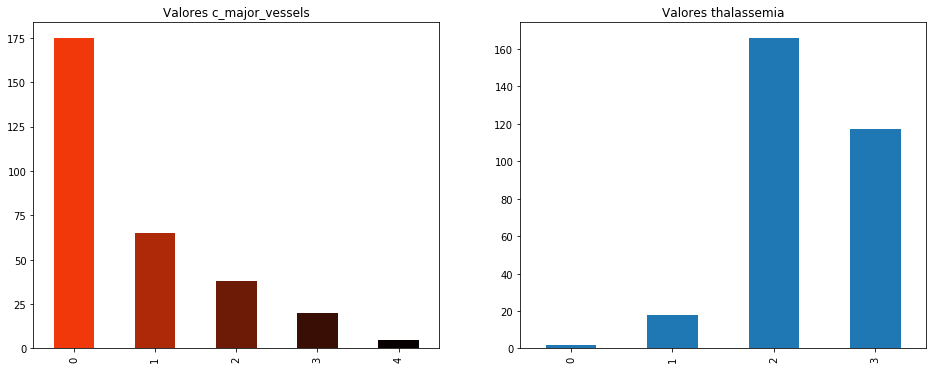

In [4]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('Valores c_major_vessels')
full.c_major_vessels.value_counts().sort_index().plot.bar(ax=ax[0],color=["#F1380A","#AE2908","#6D1B07","#390E04","#060100"])

ax[1].set_title('Valores thalassemia')
full.thalassemia.value_counts().sort_index().plot.bar(ax=ax[1])

### Eliminamos los valores atípicos

Eliminamos los 5 valores valores que no eran coincidentes con la descripción del dataset.


In [5]:
full = full[full.c_major_vessels != 4]

full = full[full.thalassemia != 0]

### Comprobamos si existen valores nulos

In [6]:
full.isnull().sum()

age                0
sex                0
chest_pain         0
blood_pressure     0
cholesterol        0
blood_sugar        0
result_ecg         0
max_heart_rate     0
exercise_angina    0
st_depression      0
st_slope           0
c_major_vessels    0
thalassemia        0
target             0
dtype: int64

In [7]:
full.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,thalassemia,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [8]:
full.dtypes

age                  int64
sex                  int64
chest_pain           int64
blood_pressure       int64
cholesterol          int64
blood_sugar          int64
result_ecg           int64
max_heart_rate       int64
exercise_angina      int64
st_depression      float64
st_slope             int64
c_major_vessels      int64
thalassemia          int64
target               int64
dtype: object

In [9]:
full['sex'][full['sex'] == 1] = 'male'
full['sex'][full['sex'] == 0] = 'female'

full['chest_pain'][full['chest_pain'] == 0] = 'asymptomatic'
full['chest_pain'][full['chest_pain'] == 1] = 'non_anginal_pain'
full['chest_pain'][full['chest_pain'] == 2] = 'atypical_angina'
full['chest_pain'][full['chest_pain'] == 3] = 'typical_angina'

full['thalassemia'][full['thalassemia'] == 1] = 'normal'
full['thalassemia'][full['thalassemia'] == 2] = 'fixed_defect'
full['thalassemia'][full['thalassemia'] == 3] = 'reversable_defect'

### Definimos las columna sex, chest_pain, thalassemia como objeto para poder hacer el one-hot encoder

El porque de las columnas elegidas, es porque en un futuro para realizar la prediccion son las que consideramos de alto impacto para la salida, ademas de que al pooser numeros integer desde un determinado rango, consideramos que es mejor resolverlo a partir de una columna con datos binarios.

Con respecto al colesterol marcamos umbrales a partir de la busqueda de distintas clasificaciones del colesterol. Pero decidimos no separarlo en 3 columnas distintas.
<p>
El colesterol generalmente se mide en miligramos (mg) de colesterol por decilitro (dl) de sangre. La siguiente información muestra cómo se clasifican las diferentes mediciones de colesterol.
<table border="0" cellpadding="3" cellspacing="3" summary="Categoría de colesterol" width="90%">
<thead>
<tr>
<th bgcolor="#006699" id="C1" scope="col"><h3 style="color:#fff;">Nivel de colesterol total</h3></th>
<th bgcolor="#006699" id="C2" scope="col"><h3 style="color:#fff;">Categoría</h3></th>
</tr>
</thead>
<tbody>
<tr >
<td id="C1 R1">Menos de 200 mg/dL</td>
<td id="C2 R1">Deseable</td>
</tr>
<tr >
<td id="C1 R2">Entre 200 y 239 mg/dL</td>
<td id="C2 R2">Límite superior del rango normal</td>
</tr>
<tr >
<td id="C1 R3">240 mg/dL o más</td>
<td id="C2 R3">Alto</td>
</tr>
</tbody></table>
<br>
<div align=right>
<a href="https://medlineplus.gov/spanish/pruebas-de-laboratorio/niveles-de-colesterol/"><strong>Fuente</strong> </a></div>

In [10]:
full['sex'] = full['sex'].astype('object')
full['chest_pain'] = full['chest_pain'].astype('object')
full['thalassemia'] = full['thalassemia'].astype('object')

### Generamos el one-hot encoder

In [11]:
full = pd.get_dummies(full)

In [12]:
full.head()

,age,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,target,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical_angina,chest_pain_non_anginal_pain,chest_pain_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0,0,1,0,1,0
1,37,130,250,0,1,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0,0
2,41,130,204,0,0,172,0,1.4,2,0,1,1,0,0,0,1,0,1,0,0
3,56,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,1,0,1,0,0
4,57,120,354,0,1,163,1,0.6,2,0,1,1,0,1,0,0,0,1,0,0


<strong> Variables de entrada:</strong> 
<li>age</li> 
<li>sex_female</li>
<li>sex_male</li>
<li>chest_pain_asymptomatic</li>
<li>chest_pain_atypical_angina</li>
<li>chest_pain_non-anginal_pain	</li>
<li>chest_pain_typical_angina</li>
<li>thalassemia_fixed_defect</li>
<li>thalassemia_normal</li>
<li>thalassemia_reversable_defect</li>
<li>blood_pressure</li>
<li>cholesterol</li>
<li>blood_sugar</li>
<li>result_ecg</li>
<li>max_heart_rate</li>
<li>exercise_angina</li>
<li>st_depression</li>
<li>st_slope</li>
<li>c_major_vassels</li>

<strong> Variables de salida: </strong> <li> target <strong> | Valores ( 0 si no posee enfermedad, 1 si posee) </strong> </li> 

# Balance de los datos

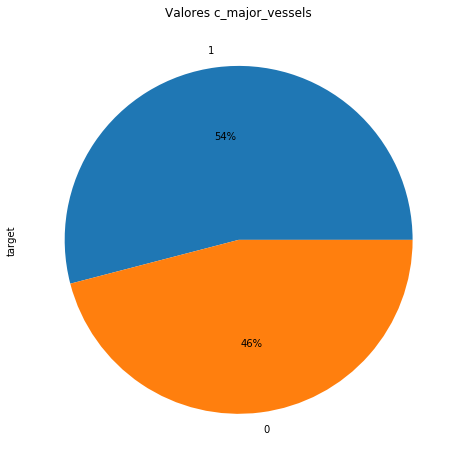

In [13]:
f,ax=plt.subplots(1,1,figsize=(8,8))
ax.set_title('Valores c_major_vessels')


(full.target.value_counts() / full.shape[0] * 100 ).plot.pie(autopct='%1.0f%%',ax=ax)

Como se observa en la grafica los datos de la variable de salida estan balanceados debido a que tengo un <strong>46%</strong> de valores en <strong>0</strong> lo cual significa la no presencia de una enfermedad cardiaca y el <strong>54%</strong> en <strong>1</strong> que significa la presencia de la misma, lo cual nos trae como ventaja que el algoritmo, no se dificultara en encontrar el resultado de la salida, es decir si posee o no una enfermedad cardiaca.

# Enfermos segun sexo

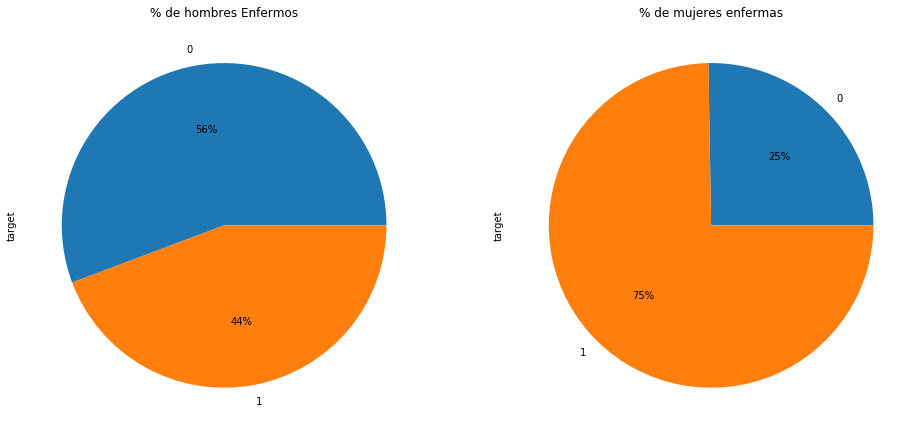

In [14]:
f,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_title('% de hombres Enfermos')
full[full.sex_male==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[0])

ax[1].set_title('% de mujeres enfermas')
full[full.sex_female==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[1])

A partir de las graficas, podemos afirmar que el sexo de la persona tiene bastante relevancia a la hora de tener una enfermedad cardiaca. Podemos apreciar que solo el 44% tiene la afeccion, mientras que las mujeres enfermas, suman un 75% del total.


# Enfermos segun talasemia

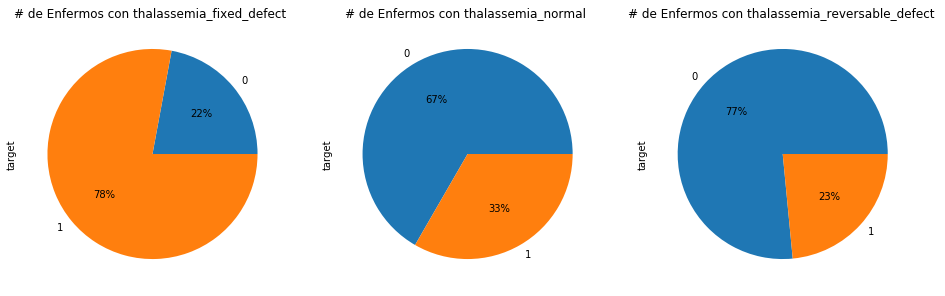

In [15]:
f,ax=plt.subplots(1,3,figsize=(16,8))
ax[0].set_title('# de Enfermos con thalassemia_fixed_defect ')
full[full.thalassemia_fixed_defect==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[0])
ax[1].set_title('# de Enfermos con thalassemia_normal ')
full[full.thalassemia_normal==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[1])
ax[2].set_title('# de Enfermos con thalassemia_reversable_defect ')
full[full.thalassemia_reversable_defect==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[2])

# Enfermos segun el nivel de azucar en la sangre

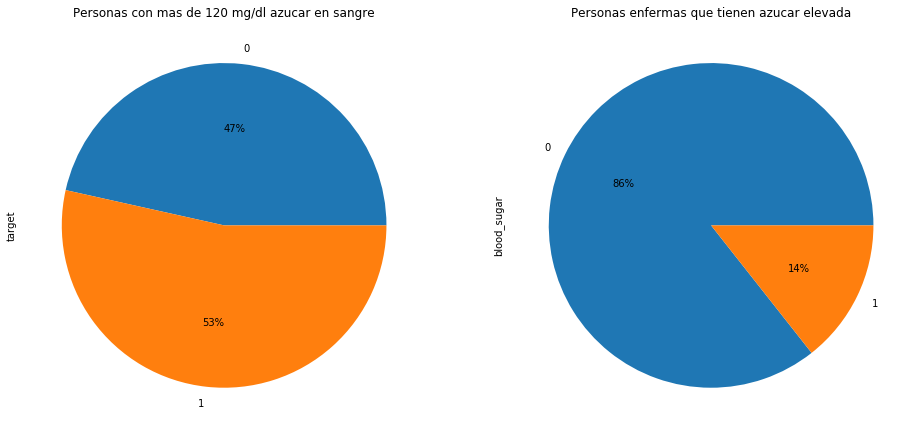

In [16]:
f,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_title('Personas con mas de 120 mg/dl azucar en sangre')
full[full.blood_sugar==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%',ax=ax[0])
ax[1].set_title('Personas enfermas que tienen azucar elevada')
full[full.target==1].blood_sugar.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[1])

Segun los graficos, podemos observar que tener mas de 120 mg/dl de azucar en sangre no parece impactar demasiado en la enfermedad. Sin embargo, mirando desde el lado de los enfermos, notamos que solo el 14% de ellos tiene el azucar elevada, lo que nos llevaria a pensar que esto no impacta a la hora de contraer la enfermedad.


# Enfermos segun los dolores en el pecho

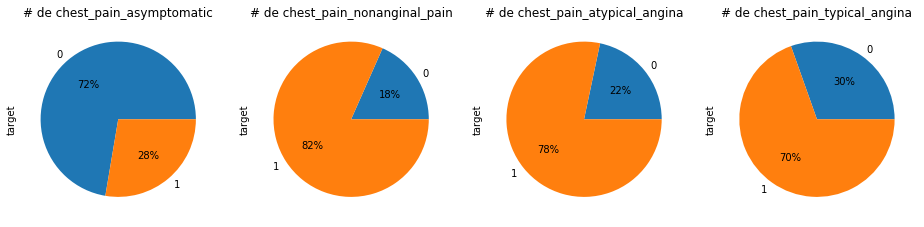

In [17]:
f,ax=plt.subplots(1,4,figsize=(16,8))
ax[0].set_title('# de chest_pain_asymptomatic')
full[full.chest_pain_asymptomatic==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[0])

ax[1].set_title('# de chest_pain_nonanginal_pain')
full[full.chest_pain_non_anginal_pain==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[1])

ax[2].set_title('# de chest_pain_atypical_angina')
full[full.chest_pain_atypical_angina==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[2])

ax[3].set_title('# de chest_pain_typical_angina')
full[full.chest_pain_typical_angina==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[3])

A la hora de hablar de los dolores en el pecho, notamos segun la grafica que la mayoria tiene un gran impacto sobre la enfermedad cardiaco. Siendo el de mayor impacto el paciente que tiene dolores no provenientes de la angina.

# Enfermos segun la pendiente del electrocardiograma

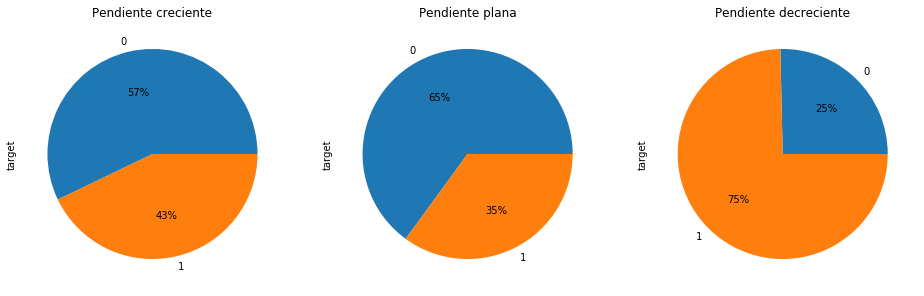

In [18]:
f,ax=plt.subplots(1,3,figsize=(16,8))
ax[0].set_title('Pendiente creciente')
full[full.st_slope==0].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[0])
ax[1].set_title('Pendiente plana')
full[full.st_slope==1].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[1])
ax[2].set_title('Pendiente decreciente')
full[full.st_slope==2].target.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=ax[2])

De acuerdo con lo graficos, notamos que la pendiente del electrocardiograma es relevante para detectar la enfermedad cardiaca, ya que en el caso de una pendiente decreciente, la enfermedad esta presente en el 75 % de los casos.


# Correlacion entre las variables

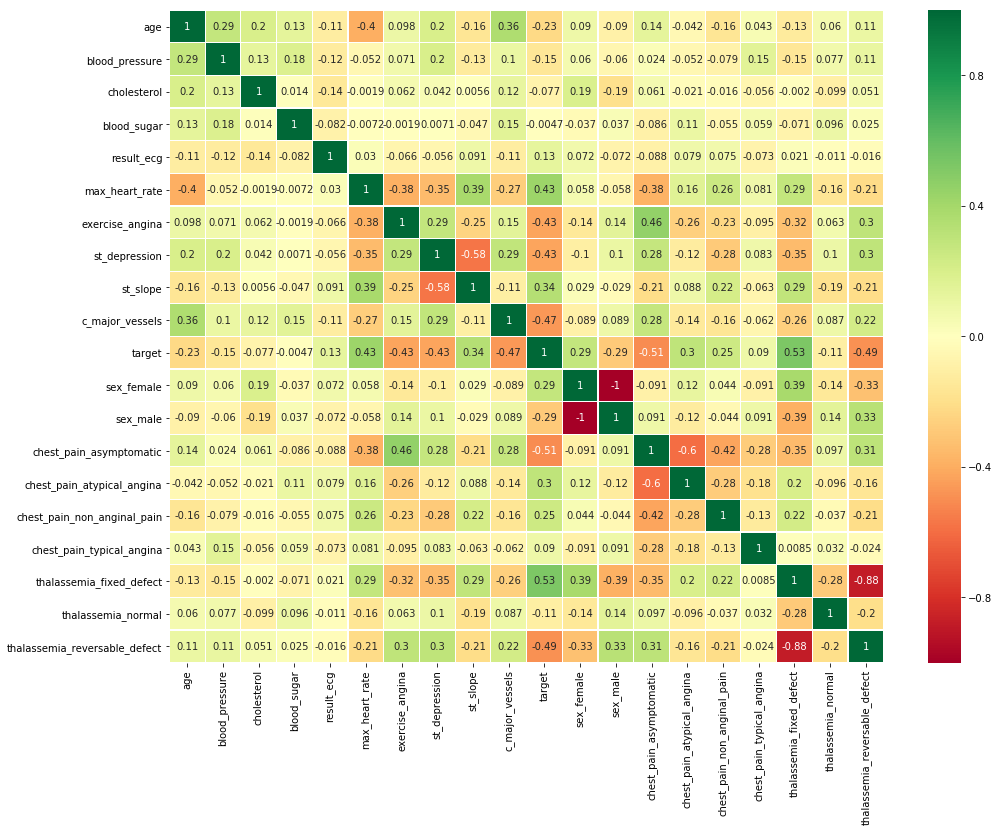

In [19]:
sns.heatmap(full.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.show()

In [20]:
#Guardamos el dataset con las ingenieria de feature en un archivo .csv
full.to_csv('heart_features.csv', encoding='utf-8')

In [21]:
full.head()

,age,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,target,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical_angina,chest_pain_non_anginal_pain,chest_pain_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0,0,1,0,1,0
1,37,130,250,0,1,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0,0
2,41,130,204,0,0,172,0,1.4,2,0,1,1,0,0,0,1,0,1,0,0
3,56,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,1,0,1,0,0
4,57,120,354,0,1,163,1,0.6,2,0,1,1,0,1,0,0,0,1,0,0
